In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
import pandas as pnd
import seaborn as sns
import subprocess

pathex = "/home/gabriel/Desktop/ProjectFiles/ColloidalMembranes/CodeMega/DataAnalysis/Round9"
pathpiwall = "/home/gabriel/Desktop/ProjectFiles/ColloidalMembranes/CodeMega/DataAnalysis/PiWall"
gs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p = 0.05
qs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]

/home/gabriel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sns.set_theme(font_scale = 2)

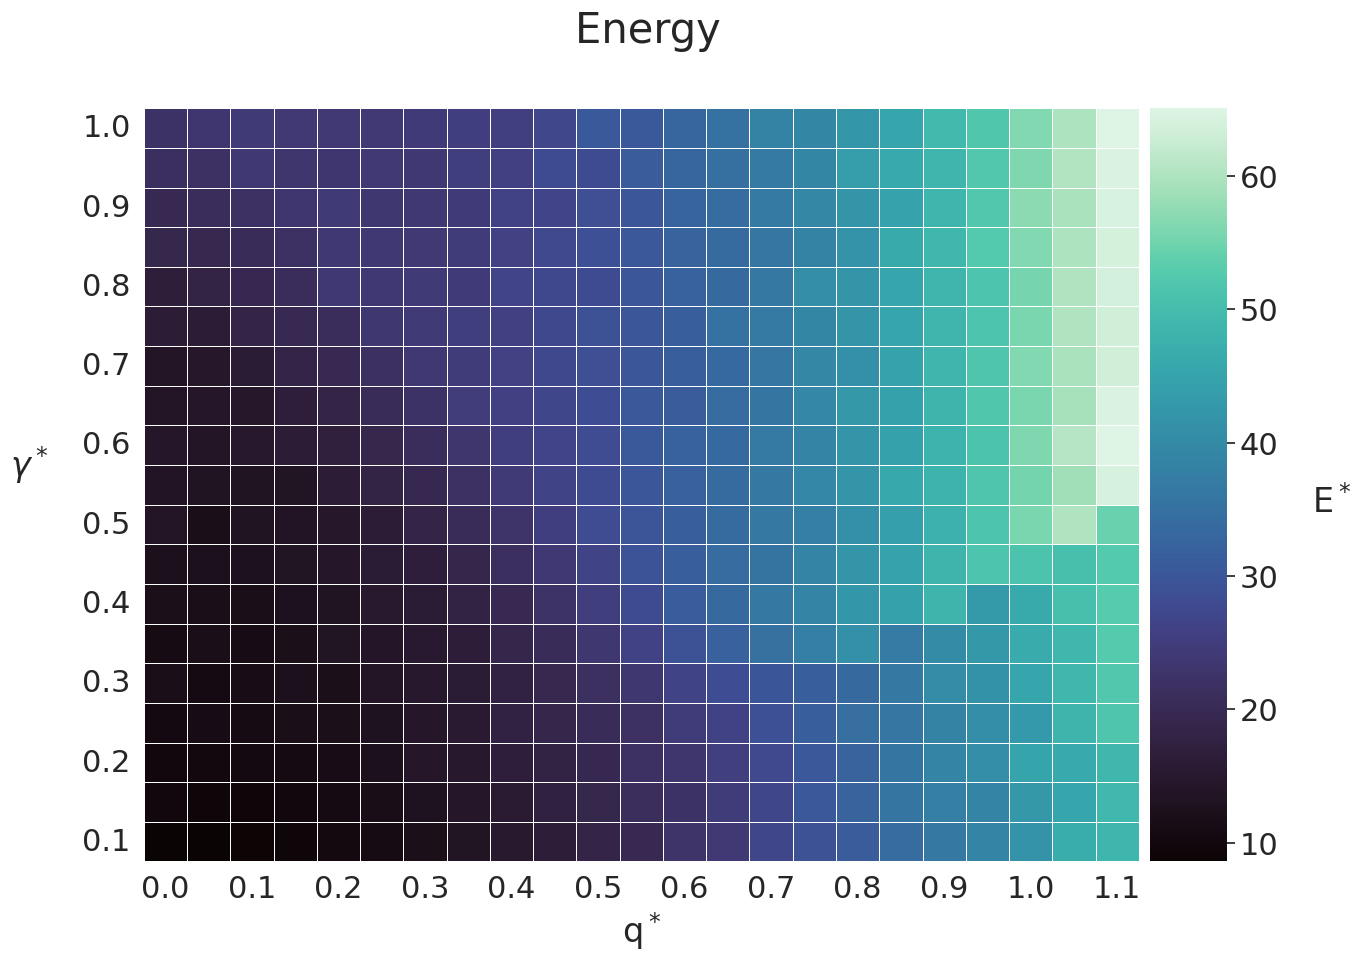

In [3]:
pop = "\n"
delimiter = ","
porenergies = open(pathex+"/EnergyData2.txt","r")
energydata = porenergies.readlines()[1:]
dic = {"p":[], "g":[], "q":[], "Energy":[]}
for line in energydata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["p"].append(float(line[0]))
    dic["g"].append(float(line[1]))
    dic["q"].append(float(line[2]))
    dic["Energy"].append(float(line[3]))
df = pnd.DataFrame(dic)

f1slice = df["p"] == p
f1sliced = df[f1slice]

gs = list(set(df["g"]))
qs = list(set(df["q"]))

gs.sort()
qs.sort()

en = np.array([[f1sliced[(f1sliced["q"]==q) & (f1sliced["g"]==g)]["Energy"].iloc[0] for q in qs] for g in gs])


en = np.array([[round(en[i, j], ndigits=4) for j in np.arange(0, len(en[1, :]), 1)] for i in np.arange(0, len(en[:, 1]), 1)])

# arr2 = [[f2sliced[(f2sliced["q"]==q) & (f2sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr2 = np.array(arr2)*4

# arr3 = [[f3sliced[(f3sliced["q"]==q) & (f3sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr3 = np.array(arr3)*4

# vmin = 0, vmax = 30

fig = plt.figure(constrained_layout=True)
fig.suptitle("Energy     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(en, annot = False, cmap = "mako", linewidth=0.5, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel("q$^*$", fontsize = 24)
ax1.set_ylabel("$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel("\t E$^*$", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(.5, 18.5, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(.5, 22.5, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)


plt.show()
fig.savefig(pathex +f"/EnergyDiagramp={p}.png", dpi = 300)

In [4]:
pop = "\n"
delimiter = ","
piwallenergies = open(pathpiwall+"/EnergyData2.txt","r")
piwallenergydata = piwallenergies.readlines()[1:]
dic = {"p":[], "q":[], "Energy":[]}
for line in piwallenergydata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["p"].append(float(line[0]))
    dic["q"].append(float(line[1]))
    dic["Energy"].append(float(line[2]))
pwdf = pnd.DataFrame(dic)

f1slice = pwdf["p"] == p
pwsliced = pwdf[f1slice]

qs = list(set(pwdf["q"]))
qs.sort()

pwarr = np.array([pwsliced[(pwsliced["q"]==q)]["Energy"].iloc[0] for q in qs[:15]])


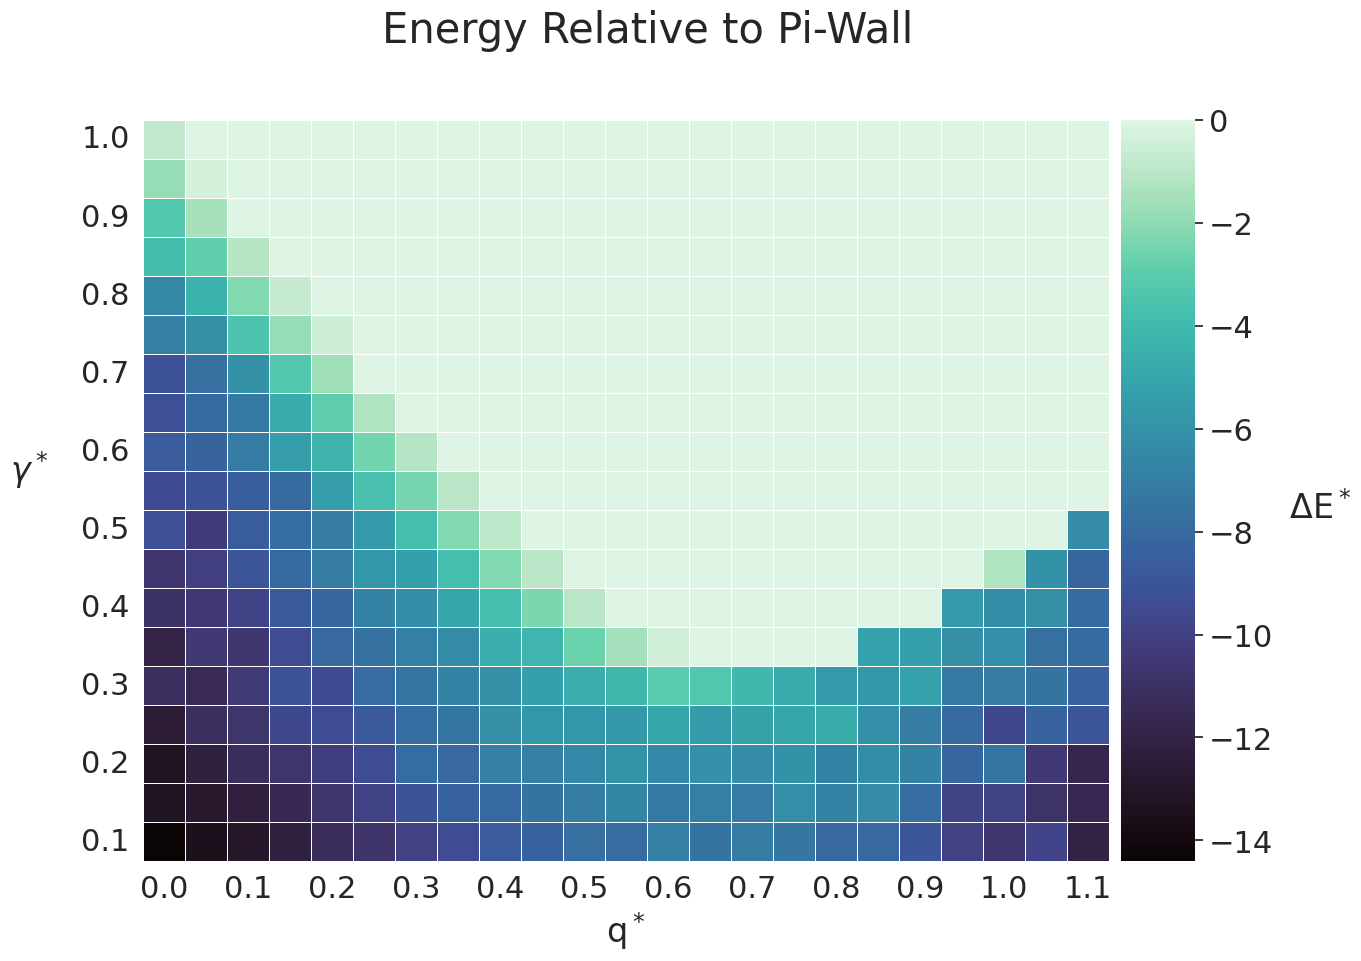

In [39]:
pop = "\n"
delimiter = ","
porenergies = open(pathex+"/EnergyData2.txt","r")
energydata = porenergies.readlines()[1:]
dic = {"p":[], "g":[], "q":[], "Energy":[]}
for line in energydata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["p"].append(float(line[0]))
    dic["g"].append(float(line[1]))
    dic["q"].append(float(line[2]))
    dic["Energy"].append(float(line[3]))
df = pnd.DataFrame(dic)

f1slice = df["p"] == p
f1sliced = df[f1slice]

gs = list(set(df["g"]))
qs = list(set(df["q"]))

gs.sort()
qs.sort()

endiff = np.array([[f1sliced[(f1sliced["q"]==q) & (f1sliced["g"]==g)]["Energy"].iloc[0] - pwsliced[(pwsliced["q"]==q)]["Energy"].iloc[0] for q in qs] for g in gs])


endiff = np.array([[round(endiff[i, j], ndigits=4) if endiff[i, j] < 0 else 0 for j in np.arange(0, len(endiff[1, :]), 1)] for i in np.arange(0, len(endiff[:, 1]), 1)])

# arr2 = [[f2sliced[(f2sliced["q"]==q) & (f2sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr2 = np.array(arr2)*4

# arr3 = [[f3sliced[(f3sliced["q"]==q) & (f3sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr3 = np.array(arr3)*4

# vmin = 0, vmax = 30

fig = plt.figure(constrained_layout=True)
fig.suptitle("Energy Relative to Pi-Wall     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(endiff, annot = False, cmap = "mako", linewidth=0.5, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel("q$^*$", fontsize = 24)
ax1.set_ylabel("$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel("\t$\Delta$E$^*$", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(.5, 18.5, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(.5, 22.5, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)


# from scipy import interpolate

# pts = [[-0.1, 1.125],[0.0, 0.95],[0.1, 0.8],[0.5, 0.35],[0.7, 0.3],[0.9, 0.35],[1.0, 0.43],[1.1, 0.54],[1.2, 0.64]]
# x = [0.5+ 10*pt[0] for pt in pts]
# y = [10*pt[1] - 0.5 for pt in pts]
# f = interpolate.interp1d(x,y,kind='cubic')
# xnew = np.arange(0.0, 12, 0.1)
# ynew = f(xnew)   # use interpolation function returned by `interp1d`
# ax2.plot(xnew, ynew, '-')


plt.show()
fig.savefig(pathex +f"/EnergyDiffDiagramp={p}.png", dpi = 300)



In [6]:
from scipy import interpolate
from scipy.interpolate import griddata

In [7]:
# from itertools import chain

# grid_x, grid_y = np.mgrid[0:1.1:120j, 0.1:1:100j]

# points = list(chain(*[[[q,g] for q in qs2] for g in gs]))
# energies =  list(chain(*[[endiff[j,i] for i in range(0,len(qs))] for j in range(0, len(gs))]))

# grid_z2 = griddata(points, energies, (grid_x, grid_y), method='cubic')


In [8]:


# fig = plt.figure(constrained_layout=True)
# fig.suptitle("           Phases of Pore Stability", fontsize=30)
# gspec = fig.add_gridspec(1,2, width_ratios= [1, 26])
# ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
# ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
# ax2 = fig.add_subplot(gspec[0,1])


# fig.set_size_inches((len(qs)+4)/2, (len(gs)+2)/2)
# hm = sns.heatmap(grid_z2.T, annot = False, cmap = sns.color_palette("light:b_r", as_cmap=True), linewidth=0, linecolor="white",vmin=-20,  cbar=False, ax = ax2)

# ax2.invert_yaxis()
# ax2.set_xlabel("q$^*$", fontsize = 24)
# ax1.set_ylabel("$\gamma^*$", fontsize = 24, rotation = 0)
# ax2.set_yticks(np.linspace(5, 95, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
# ax2.set_xticks(np.linspace(5, 115, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)

# from scipy import interpolate

# pts = [[-0.1, 1.125],[0.0, 0.95],[0.1, 0.8],[0.5, 0.35],[0.6, 0.3],[0.65, 0.31],[0.7, 0.33],[0.8, 0.34],[0.85, 0.36], [0.9, 0.375],[1.0, 0.43],[1.1, 0.54],[1.2, 0.64]]
# x = [5+ 100*pt[0] for pt in pts]
# y = [100*pt[1] - 5 for pt in pts]
# f = interpolate.interp1d(x,y,kind='cubic')
# xnew = np.arange(0.0, 120, 1)
# ynew = f(xnew)   # use interpolation function returned by `interp1d`
# ax2.plot(xnew, ynew, 'b-', lw=3)
# ax2.plot([65, 65], [0, f(65)], 'b--', lw=3)
# ax2.text(10,25,"Twisted-Edge Pores", alpha=1, c='Black')
# ax2.text(65,70,"Pi-Walls", alpha=1, c='Black')
# ax2.text(75,15,"Bent-Edge Pores", alpha=1, c='Black')

# plt.show()
# fig.savefig(pathex +f"/EnergyPhaseDiagramp={p}.png", dpi = 300)

In [9]:

# # for q=0.5, g=0.1
# PressureTerm1= 4.337719817186655 
# EdgeTensionTerm1= 10.61198167473662 
# TwistTerm1= 37.57330857908932 
# SplayTerm1= 0.0541899848448434 
# BendTerm1= 0.9162187997108531 
# TiltTerm1= 2.965388966622634
# # names1 = ["Splay", "Bend", "Tilt"]
# names = ["Pressure", "Edge Tension", "Twist", "Splay", "Bend", "Tilt"]
# energies1 = [PressureTerm1, EdgeTensionTerm1, TwistTerm1, SplayTerm1, BendTerm1, TiltTerm1]
# #
# # for q=0.6, g=0.1
# PressureTerm2= 4.243916803377814 
# EdgeTensionTerm2= 17.81341356252161 
# TwistTerm2= 36.04719204323032 
# SplayTerm2= 0.04931264461442154 
# BendTerm2= 0.9664088555931212 
# TiltTerm2= 3.26066651420284

# energies2 = [PressureTerm2, EdgeTensionTerm2, TwistTerm2, SplayTerm2, BendTerm2, TiltTerm2]


# # for q=0.7, g=0.1
# PressureTerm3= 4.133989155112491 
# EdgeTensionTerm3= 18.52625247939424 
# TwistTerm3= 34.301529982889214 
# SplayTerm3= 0.04523473994037996 
# BendTerm3= 1.011797044351318 
# TiltTerm3= 3.6402828648293997

# energies3 = [PressureTerm3, EdgeTensionTerm3, TwistTerm3, SplayTerm3, BendTerm3, TiltTerm3]
# # define Seaborn color palette to use 
# palette_color = sns.color_palette('mako') 
  
# # plotting data on chart 
# plt.pie(energies1, labels=names, colors=palette_color,pctdistance=1.2,labeldistance=1.5, autopct='%.0f%%') 
  
# # displaying chart 
# plt.show() 

# # define Seaborn color palette to use 
# palette_color = sns.color_palette('mako') 
  
# # plotting data on chart 
# plt.pie(energies2, labels=names, colors=palette_color,pctdistance=1.2,labeldistance=1.5, autopct='%.0f%%') 
  
# # displaying chart 
# plt.show() 

# # define Seaborn color palette to use 
# palette_color = sns.color_palette('mako') 
  
# # plotting data on chart 
# plt.pie(energies3, labels=names, colors=palette_color,pctdistance=1.2,labeldistance=1.5, autopct='%.0f%%') 
  
# # displaying chart 
# plt.show() 

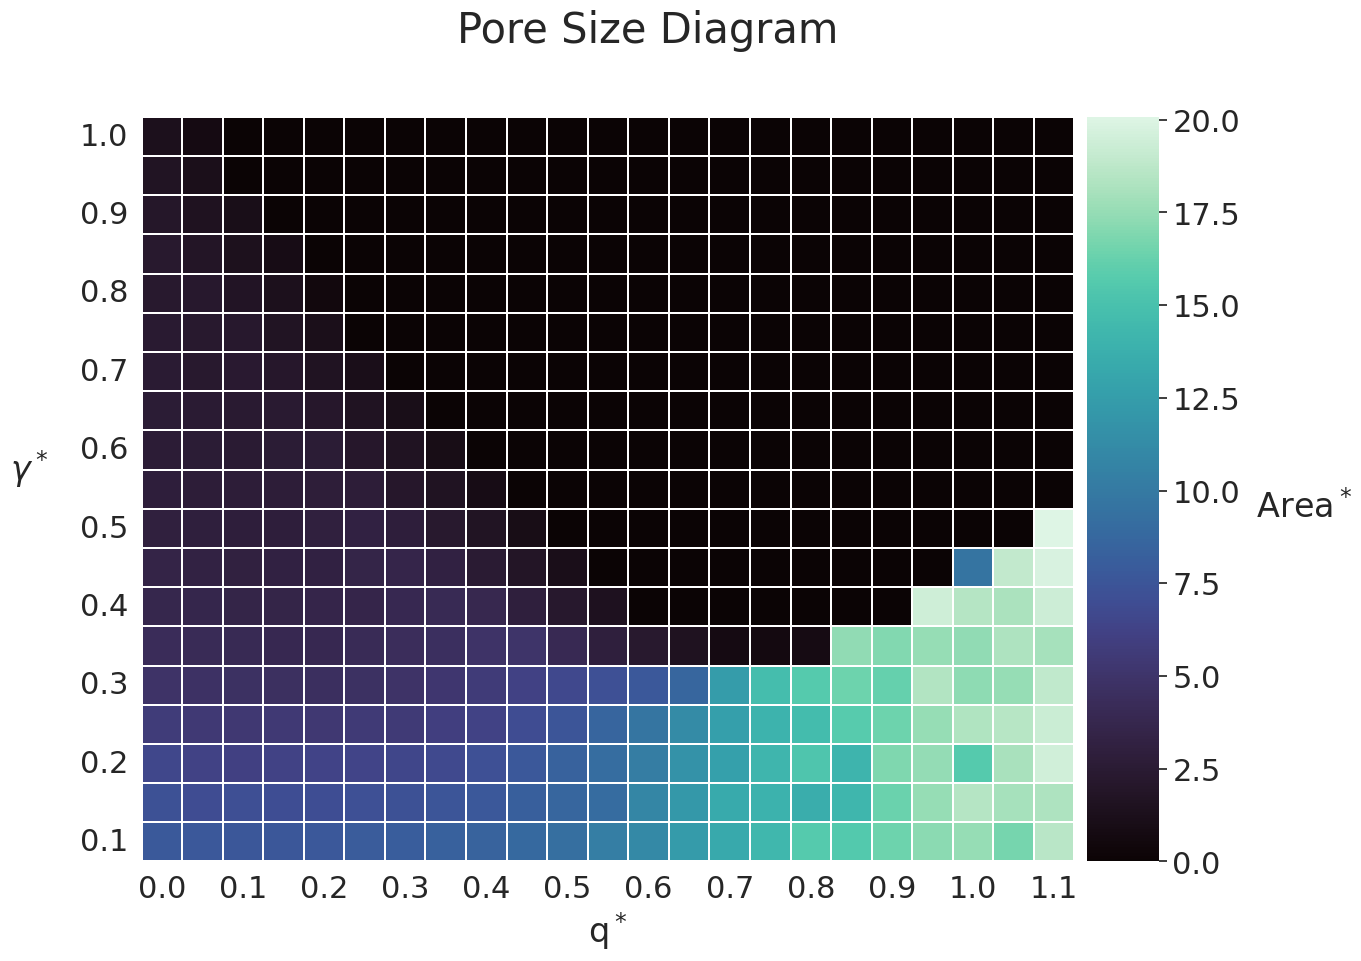

In [44]:
pop = "\n"
delimiter = ","
poresizes = open(pathex+"/PoreSizeData.txt","r")
sizedata = poresizes.readlines()[1:]
dic = {"g":[], "p":[], "q":[], "pore_area":[]}
for line in sizedata:
    line = line.replace(pop, "")
    line = line.split(delimiter)
    dic["g"].append(float(line[0]))
    dic["p"].append(float(line[1]))
    dic["q"].append(float(line[2]))
    dic["pore_area"].append(float(line[3]))
df = pnd.DataFrame(dic)

f1slice = df["p"] == p
f1sliced = df[f1slice]

gs = list(set(df["g"]))
qs = list(set(df["q"]))

gs.sort()
qs.sort()

sizes = np.array([[f1sliced[(f1sliced["q"]==q) & (f1sliced["g"]==g)]["pore_area"].iloc[0] for q in qs] for g in gs])

sizes = np.array([[round(sizes[i, j], ndigits=4) if sizes[i, j] > 0.5 else 0 for j in np.arange(0, len(sizes[1, :]), 1)] for i in np.arange(0, len(sizes[:, 1]), 1)])

# arr2 = [[f2sliced[(f2sliced["q"]==q) & (f2sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr2 = np.array(arr2)*4

# arr3 = [[f3sliced[(f3sliced["q"]==q) & (f3sliced["g"]==g)]["ps"].iloc[0] for q in qs] for g in gs]
# arr3 = np.array(arr3)*4

# vmin = 0, vmax = 30

fig = plt.figure(constrained_layout=True)
fig.suptitle("Pore Size Diagram     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+4)/2, (len(gs))/2)
sns.heatmap(sizes, annot = False, cmap = "mako", linewidth=0.01, linecolor="white",  cbar_ax=ax3, ax = ax2)
ax2.invert_yaxis()
ax2.set_xlabel("q$^*$", fontsize = 24)
ax1.set_ylabel("$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel("\t   Area$^*$", fontsize = 24, rotation = 0)
ax2.set_yticks(np.linspace(.5, 18.5, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(.5, 22.5, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)



plt.show()
fig.savefig(pathex +f"/PoreSizeDiagramp={p}.png", dpi = 300)



In [53]:
from itertools import chain

grid_x, grid_y = np.mgrid[0:1.1:115j, 0.1:1:95j]

points = list(chain(*[[[q,g] for q in qs] for g in gs]))
sizesc =  list(chain(*[[sizes[j,i] for i in range(0,len(qs))] for j in range(0, len(gs))]))

sizesint = griddata(points, sizesc, (grid_x, grid_y), method='nearest')
sizesint = sizesint.T 

print(len(sizesint)*len(sizesint[1]))

ct=0

for i,row in enumerate(sizesint):
    for j,pt in enumerate(row):
        if pt < 0.5: sizesint[i,j]=0; ct+=1
print(ct)
ct=0

for row in sizesint:
    for pt in row:
        if pt ==0: pt=0; ct+=1
print(ct)

10925
5276
5276


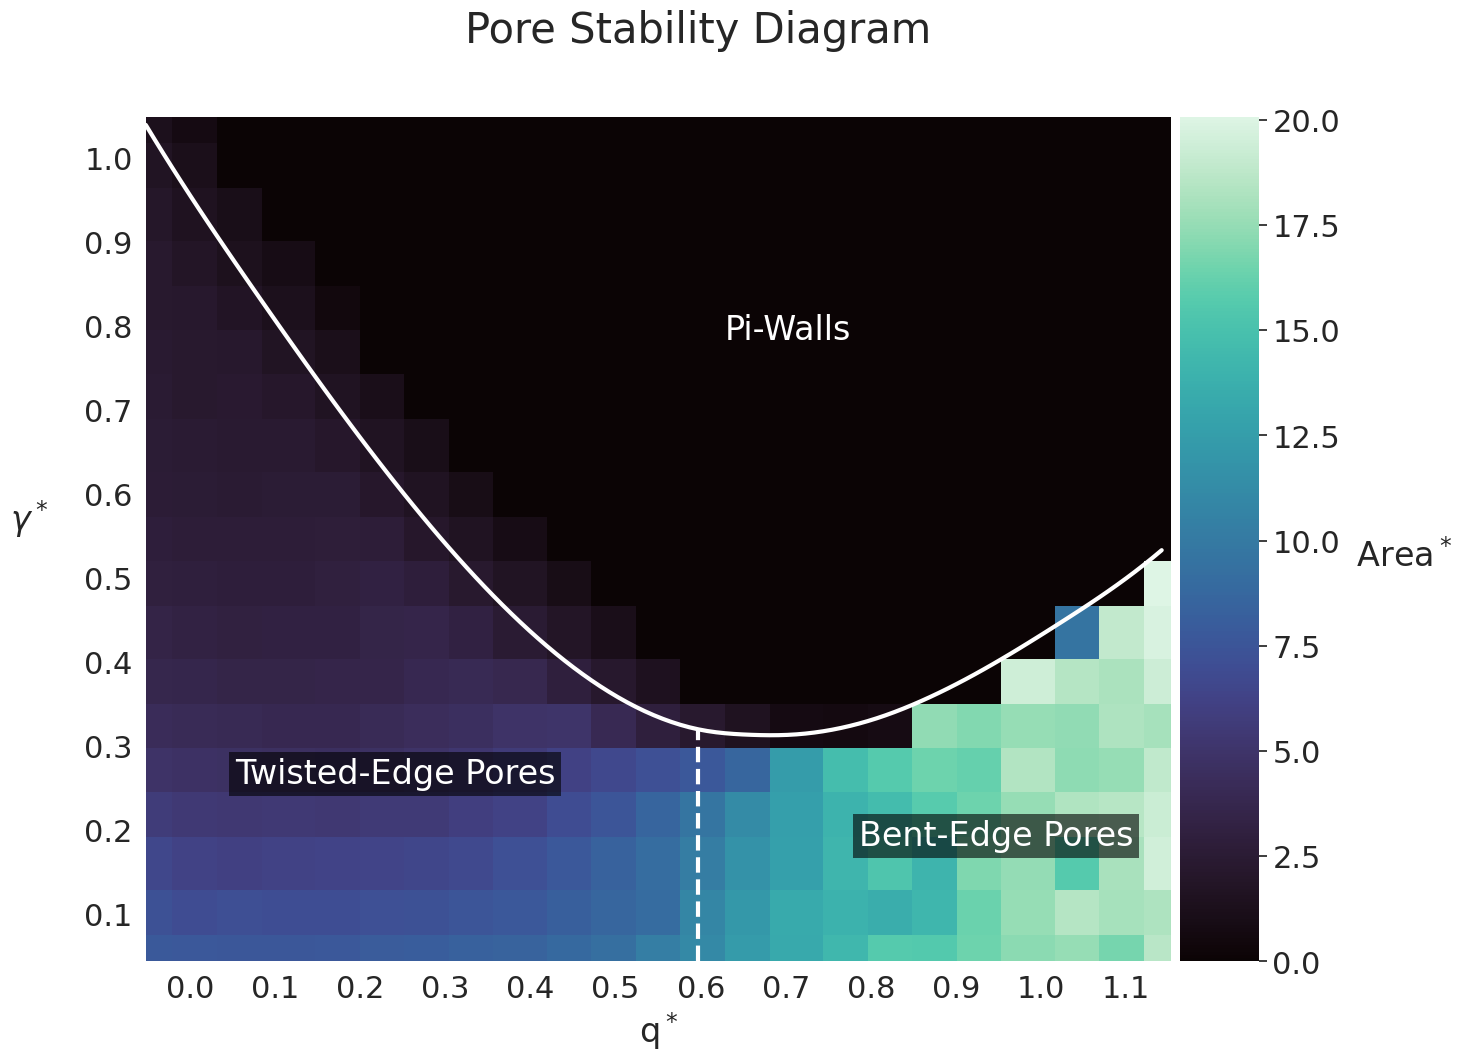

In [55]:
fig = plt.figure(constrained_layout=True)
fig.suptitle("Pore Stability Diagram     \n", fontsize=30)
gspec = fig.add_gridspec(1,3, width_ratios= [1, 26, 2])
ax1 = fig.add_subplot(gspec[0,0],  facecolor='white')
ax1.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax2 = fig.add_subplot(gspec[0,1])
ax3 = fig.add_subplot(gspec[0,2])

fig.set_size_inches((len(qs)+6)/2, (len(gs)+2)/2)
hm = sns.heatmap(sizesint, annot = False, cmap = sns.color_palette("mako", as_cmap=True), linewidth=0, linecolor="white",  cbar_ax=ax3, ax = ax2)

ax2.invert_yaxis()
ax2.set_xlabel("q$^*$", fontsize = 24)
ax1.set_ylabel("$\gamma^*$", fontsize = 24, rotation = 0)
ax3.set_ylabel("\t   Area$^*$", fontsize = 24, rotation = 0)

ax2.set_yticks(np.linspace(5, 90, 10), labels=np.around(np.linspace(0.1, 1.0, 10), decimals = 2 ), rotation = 0)
ax2.set_xticks(np.linspace(5, 110, 12), labels=np.around(np.linspace(0.0, 1.1, 12), decimals = 2 ),  rotation = 0)

from scipy import interpolate

pts = [[-0.1, 1.125],[0.0, 0.95],[0.1, 0.8],[0.5, 0.35],[0.6, 0.31],[0.65, 0.305],[0.7, 0.305],[0.8, 0.325],[0.85, 0.345], [0.9, 0.37],[1.0, 0.43],[1.1, 0.5],[1.2, 0.6]]
x = [(0.5+pt[0]/0.05)*5 for pt in pts]
y = [(pt[1]/0.05-1)*5 for pt in pts]
f = interpolate.interp1d(x,y,kind='cubic')
xnew = np.arange(0.0, 115, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
ax2.plot(xnew, ynew, 'w-', lw=3)
ax2.plot([62, 62], [0, f(62)], 'w--', lw=3)
ax2.text(10,20,"Twisted-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))
ax2.text(65,70,"Pi-Walls", alpha=1, c='White')
ax2.text(80,13,"Bent-Edge Pores", alpha=1, c='White', bbox=dict(facecolor='Black',  alpha=0.6, lw=0))

plt.show()
fig.savefig(pathex +f"/PoreStabilityDiagramp={p}.png", dpi = 300)